In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Проектная работа по модулю “Математика и статистика в Python”

**1. Загрузить файл hr.csv.** <br>

In [2]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [3]:
# Все кроме моды
part_1 = hr.describe().iloc[[0, 1, 2, 3, 7], : ]
part_1.insert(0, 'statistic_type', part_1.index)

# Мода
part_2 = hr.iloc[:,0:8].mode()

# Мод может быть несколько (генерирую названия статистик вида mode_i)
mode_rows = []
for i in range (len(part_2)):
    mode_rows.append(f'mode_{i+1}')
part_2.insert(0, 'statistic_type', mode_rows)

# Объединяем все статистики, выставляем индекс и округляем
statistics = part_1.append(part_2).set_index('statistic_type').round(2)
statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
statistic_type,,,,,,,,
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00
mode_1,0.10,0.55,4.00,135.00,3.00,0.00,0.00,0.00
mode_2,NaN,NaN,NaN,156.00,NaN,NaN,NaN,NaN


**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

In [4]:
corr_matrix = hr.corr().round(2)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


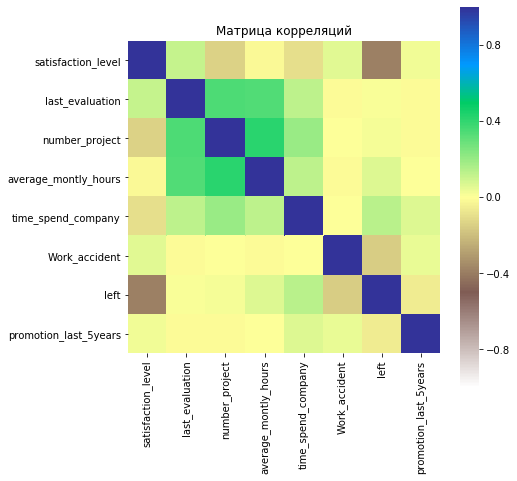

In [5]:
plt.figure(figsize=(7, 7))

ax = plt.axes()
ax.set_title('Матрица корреляций')

sns.heatmap(corr_matrix, cmap = 'terrain_r', square=True, vmin = -1, vmax = 1)

plt.show()

**4. Визуализировать несколько взаимосвязей между переменными.**

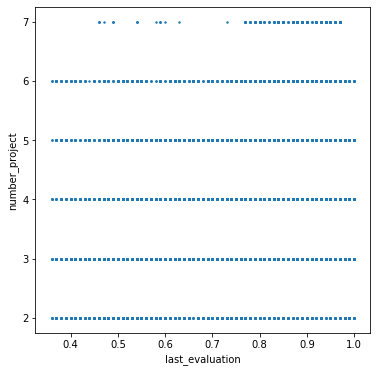

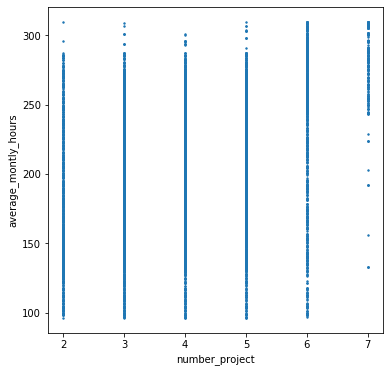

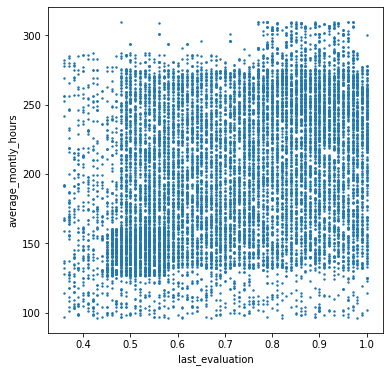

In [6]:
x = hr[['last_evaluation', 'number_project', 'average_montly_hours']]
sizeXY = (6,6)
sizeP = 2

plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = sizeP)
plt.show()

plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[2])
plt.scatter(x.iloc[:,1], x.iloc[:,2], s = sizeP)
plt.show()

plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[2])
plt.scatter(x.iloc[:,0], x.iloc[:,2], s = sizeP)
plt.show()

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [7]:
a = hr['number_project']
b = hr['last_evaluation']

stats.ttest_ind(a, b)

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

In [8]:
a, a_uniques = hr['salary'].factorize() 
b = hr['satisfaction_level']

stats.ttest_ind(a, b)

Ttest_indResult(statistic=-3.2458093631524347, pvalue=0.0011724564829778015)

*Нулевые гипотезы H0 (а равенстве математических ожиданий 2 случайных величин) отвергаются, т.к. pvalue < 0.05. Т.е. величины number_project и last_evaluation (salary и satisfaction_level) различаеются*

**6. Рассчитать сколько работников работает в каждом департаменте.**

In [9]:
#workers_amt = hr['sales'].value_counts()
workers_amt = hr.groupby('sales').count().iloc[:,0]
workers_amt

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

**7. Показать распределение сотрудников по зарплатам.**

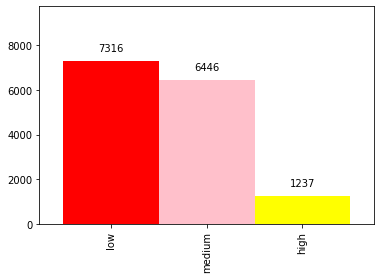

In [10]:
x = hr['salary']

colors = ['red', 'pink', 'yellow']

ax = x.value_counts().plot.bar(width = 1, color = colors)
bar_heights = [] # Высоты столбцов

for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', xytext=(0, 10),
                textcoords='offset points')
    bar_heights.append(p.get_height())
    
ax.set_ylim(0,max(bar_heights) + max(bar_heights)/3)

plt.show()

**8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

In [11]:
x = hr.groupby(['salary', 'sales']).count().reindex(["low", "medium", "high"], level=0)
y = x[x.index.get_level_values(0) == 'low']

#y = x.index.get_level_values(0)
y

satisfaction_level  last_evaluation  number_project  \
salary sales                                                              
low    IT                          609              609             609   
       RandD                       364              364             364   
       accounting                  358              358             358   
       hr                          335              335             335   
       management                  180              180             180   
       marketing                   402              402             402   
       product_mng                 451              451             451   
       sales                      2099             2099            2099   
       support                    1146             1146            1146   
       technical                  1372             1372            1372   

                    average_montly_hours  time_spend_company  Work_accident  \
salary sales                                                                  
low    IT                            609                 609            609   
       RandD                         364                 364            364   
       accounting                    358                 358            358   
       hr                            335                 335            335   
       management                    180                 180            180   
       marketing                     402                 402            402   
       product_mng                   451                 451            451   
       sales                        2099                2099           2099   
       support                      1146                1146           1146   
       technical                    1372                1372           1372   

                    left  promotion_last_5years  
salary sales                                     
low    IT            609                    609  
       RandD         364                    364  
       accounting    358                    358  
       hr            335                    335  
       management    180                    180  
       marketing     402                    402  
       product_mng   451                    451  
       sales        2099                   2099  
       support      1146                   1146  
       technical    1372                   1372

In [12]:
def get_color(row):
    if row['salary'] == 'low':
        return 'r'
    elif row['salary'] == 'medium':
        return 'b'
    else:
        return 'g'

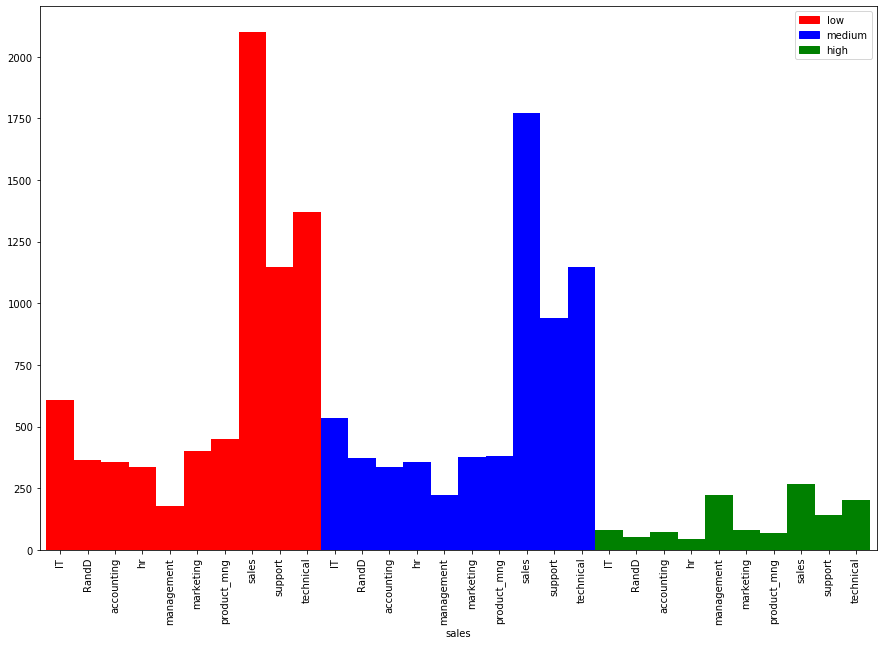

In [13]:
x = hr.groupby(['salary', 'sales']).count().reindex(["low", "medium", "high"], level=0)
x = x.reset_index(level = ['salary', 'sales'])
x['color'] = x.apply(get_color, axis = 1)
x = x.set_index('sales')

ax = x['satisfaction_level'].plot.bar(width = 1, figsize=(15,10), color = x['color'])

colors = {'low':'red', 'medium':'blue', 'high':'green'}         
labels = list(colors.keys())
handlers = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handlers, labels)

plt.show()

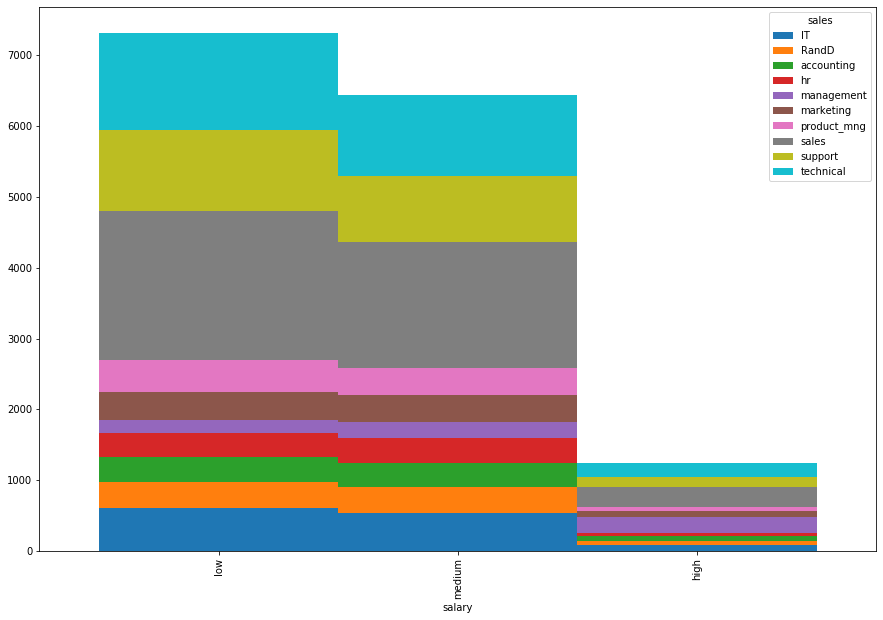

In [14]:
x = hr.groupby(['salary', 'sales']).count().reindex(["low", "medium", "high"], level=0)
x_unstack = x['satisfaction_level'].unstack()
x_unstack.plot(kind='bar', stacked=True, width = 1, figsize=(15,10))
plt.show()

**9. Сколько сотрудников покинули компанию.**

In [15]:
x = hr[hr['left'] == 1]['left'].count()
print(f'Количество сотрудников, покинувших компанию: {x} человек')

Количество сотрудников, покинувших компанию: 3571 человек


**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

In [16]:
def get_value(row):
    if row['salary'] == 'low':
        return 0
    elif row['salary'] == 'medium':
        return 1
    else:
        return 2

In [17]:
from scipy.stats import chi2_contingency

hr = pd.read_csv('hr.csv')
hr['salary_code'] = hr.apply(get_value, axis = 1)

stat, p, dof, expected = chi2_contingency(pd.crosstab(hr['left'],hr['salary_code']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Факт увольнения не зависит от зарплаты')
else:
    print('Факт увольнения зависит от зарплаты')

stat=381.225, p=0.000
Факт увольнения зависит от зарплаты


In [18]:
left_people_satisfaction_level = hr[hr['left']==1]['satisfaction_level']
stats.ttest_1samp(left_people_satisfaction_level, hr['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

*Отклоняем нулевую гипотезу, т.е. имеются различия в "уровне удовлетворенности" между выборкой уволившихся сотрудников и генеральной совокупностью*

In [19]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(hr['last_evaluation'], hr['left'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Факт увольнения не зависит от оценки сотрудника')
else:
    print('Факт увольнения зависит от оценки сотрудника')

stat=-0.002, p=0.765
Факт увольнения не зависит от оценки сотрудника
